- Exercici 1

Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 



Data set: https://www.kaggle.com/rishikeshkanabar/premier-league-player-statistics-updated-daily/tasks?taskId=2210 

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [5]:
premier_df = pd.read_csv('C:\\Users\\elgab\\Desktop\\NUBE MEGA\\PROGRAMACIÓN\\2020-2021\\IT_Academy\\itinerario DS\\bases_datos\\premier_league.csv', sep=',')
#premier_df = pd.read_csv('C:\\Users\\formacio\\Gabriel De Santis\\Datasets\\premier_league.csv', sep=',')
premier_df.head()

,Name,Jersey Number,Club,Position,Nationality,Age,Appearances,Wins,Losses,Goals,...,Punches,High Claims,Catches,Sweeper clearances,Throw outs,Goal Kicks,Yellow cards,Red cards,Fouls,Offsides
0,Bernd Leno,1.0,Arsenal,Goalkeeper,Germany,28.0,64,28,16,0,...,34.0,26.0,17.0,28.0,375.0,489.0,2,0,0,NaN
1,Matt Macey,33.0,Arsenal,Goalkeeper,England,26.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
2,Rúnar Alex Rúnarsson,13.0,Arsenal,Goalkeeper,Iceland,25.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,NaN
3,Héctor Bellerín,2.0,Arsenal,Defender,Spain,25.0,160,90,37,7,...,NaN,NaN,NaN,NaN,NaN,NaN,23,0,125,8.0
4,Kieran Tierney,3.0,Arsenal,Defender,Scotland,23.0,16,7,5,1,...,NaN,NaN,NaN,NaN,NaN,NaN,2,0,9,0.0


In [6]:
premier_df.shape

(571, 59)

In [7]:
premier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 59 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    571 non-null    object 
 1   Jersey Number           563 non-null    float64
 2   Club                    571 non-null    object 
 3   Position                571 non-null    object 
 4   Nationality             570 non-null    object 
 5   Age                     570 non-null    float64
 6   Appearances             571 non-null    int64  
 7   Wins                    571 non-null    int64  
 8   Losses                  571 non-null    int64  
 9   Goals                   571 non-null    int64  
 10  Goals per match         309 non-null    float64
 11  Headed goals            502 non-null    float64
 12  Goals with right foot   502 non-null    float64
 13  Goals with left foot    502 non-null    float64
 14  Penalties scored        309 non-null    fl

In [8]:
premier_df.isna().sum() / len(premier_df) * 100

Name                       0.000000
Jersey Number              1.401051
Club                       0.000000
Position                   0.000000
Nationality                0.175131
Age                        0.175131
Appearances                0.000000
Wins                       0.000000
Losses                     0.000000
Goals                      0.000000
Goals per match           45.884413
Headed goals              12.084063
Goals with right foot     12.084063
Goals with left foot      12.084063
Penalties scored          45.884413
Freekicks scored          45.884413
Shots                     45.884413
Shots on target           45.884413
Shooting accuracy %       45.884413
Hit woodwork              12.084063
Big chances missed        45.884413
Clean sheets              54.115587
Goals conceded            54.115587
Tackles                   12.084063
Tackle success %          31.698774
Last man tackles          66.199650
Blocked shots             12.084063
Interceptions             12

Del gran número de variables de este dataset, seleccionaremos algunas solamente.

In [9]:
premier_df.columns

Index(['Name', 'Jersey Number', 'Club', 'Position', 'Nationality', 'Age',
       'Appearances', 'Wins', 'Losses', 'Goals', 'Goals per match',
       'Headed goals', 'Goals with right foot', 'Goals with left foot',
       'Penalties scored', 'Freekicks scored', 'Shots', 'Shots on target',
       'Shooting accuracy %', 'Hit woodwork', 'Big chances missed',
       'Clean sheets', 'Goals conceded', 'Tackles', 'Tackle success %',
       'Last man tackles', 'Blocked shots', 'Interceptions', 'Clearances',
       'Headed Clearance', 'Clearances off line', 'Recoveries', 'Duels won',
       'Duels lost', 'Successful 50/50s', 'Aerial battles won',
       'Aerial battles lost', 'Own goals', 'Errors leading to goal', 'Assists',
       'Passes', 'Passes per match', 'Big chances created', 'Crosses',
       'Cross accuracy %', 'Through balls', 'Accurate long balls', 'Saves',
       'Penalties saved', 'Punches', 'High Claims', 'Catches',
       'Sweeper clearances', 'Throw outs', 'Goal Kicks', 'Yellow 

In [25]:
premier = premier_df[['Name', 'Position', 'Wins', 'Losses', 'Goals', 'Assists', 'Passes', 'Passes per match', 'Yellow cards', 'Red cards']].copy(deep=True)
premier

,Name,Position,Wins,Losses,Goals,Assists,Passes,Passes per match,Yellow cards,Red cards
0,Bernd Leno,Goalkeeper,28,16,0,0,1783,27.86,2,0
1,Matt Macey,Goalkeeper,0,0,0,0,0,0.00,0,0
2,Rúnar Alex Rúnarsson,Goalkeeper,0,0,0,0,0,0.00,0,0
3,Héctor Bellerín,Defender,90,37,7,18,7125,44.53,23,0
4,Kieran Tierney,Defender,7,5,1,1,519,32.44,2,0
...,...,...,...,...,...,...,...,...,...,...
566,Pedro Neto,Forward,14,7,3,4,399,12.87,3,0
567,Raúl Jiménez,Forward,32,23,32,13,2108,27.03,7,0
568,Adama Traoré,Forward,27,47,5,12,1434,13.66,4,0
569,Fábio Silva,Forward,0,1,0,0,1,1.00,0,0


L'atribut escollit és 'Wins'

In [26]:
#la moda, la mediana, la desviació estàndard i la mitjana aritmètica. 

moda = premier.Wins.mode().iloc[0]
print(f'Moda: {moda}')

mediana = premier.Wins.median()
print(f'Mediana: {mediana}')

des_std = premier.Wins.std()
print(f'Desviació estàndard: {des_std}')

mitjana = premier.Wins.mean()
print(f'Mitjana aritmètica: {mitjana}')

Moda: 0
Mediana: 12.0
Desviació estàndard: 38.96937599371271
Mitjana aritmètica: 28.95796847635727


<AxesSubplot:xlabel='Wins', ylabel='Count'>

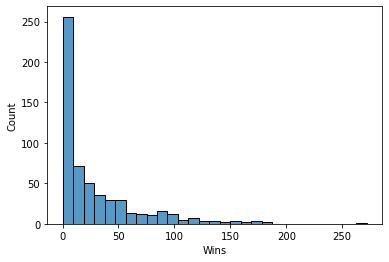

In [22]:
sns.histplot(premier.Wins)

- Exercici 2
Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. 

In [23]:
#Correlació entre el nombre de gols i el nombre de victòries de cada jugador en tota la seva carrera

premier.Wins.corr(premier.Goals)

0.6023208487443557

- Exercici 3

Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat.

<AxesSubplot:>

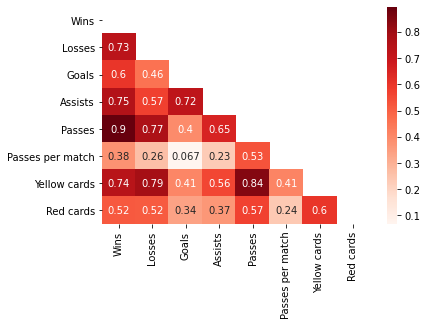

In [27]:
matrix = np.triu(premier.corr())
sns.heatmap(premier.corr(), annot=True, cmap='Reds', mask=matrix)

A primera vista, sembla que hi podrien haver algunes correlacions interessants, com per exemple entre passes-Wins. 

Semblaria que els jugadors que fan més passes a la seva carrera futbolística solen tenir un major nombre de victòries. Això es pot deure a molts factors i cabria estudiar-ho més a fons per verificar que no sigui producte d'altres factors. Si ens fixem bé, la manca de correlació amb 'Passes per match' ens pot indicar que no hi ha cap correlació real entre la quantitat de passes i la probabilitat de guanyar i que, per tant, la forta correlació entre Passes-Wins es dongui degut a que els jugadors amb una trajectòria més llarga solen acumular més número de passes així com victòries. Seria més útil treballar amb un índex que relacioni les victòries i les derrotes, a partir del qual seria més acurat realitzar una investigació respecte a la relació entre passar la pilota i la probabilitat de guanyar un partit. 

- Exercici 4

Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica.

In [67]:
positives = [x for x in premier.Goals.values if x>0]
print(f"Mitjana geomètrica de gols d'un jugador de la premier en tota la seva carrera futbolística: {stats.gmean(positives)}")
print(f"Mitjana harmònica de gols d'un jugador de la premier en tota la seva carrera futbolística: {stats.hmean(positives)}")

Mitjana geomètrica de gols d'un jugador de la premier en tota la seva carrera futbolística: 5.828542371281
Mitjana harmònica de gols d'un jugador de la premier en tota la seva carrera futbolística: 3.0265852650283303
